In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Load data
train = pd.read_csv(r'/train.csv')
test = pd.read_csv(r'/test.csv')


In [11]:

# Preprocess training data
train.Loan_Status = train.Loan_Status.map({'Y': 1, 'N': 0})
Loan_status = train.Loan_Status
train.drop('Loan_Status', axis=1, inplace=True)

In [17]:

# Combine train and test data for preprocessing
Loan_ID = test.Loan_ID
data = pd.concat([train, test], ignore_index=True)

In [18]:

# Display basic statistics
print(data.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       981.000000         981.000000  954.000000        961.000000   
mean       5179.795107        1601.916330  142.511530        342.201873   
std        5695.104533        2718.772806   77.421743         65.100602   
min           0.000000           0.000000    9.000000          6.000000   
25%        2875.000000           0.000000  100.000000        360.000000   
50%        3800.000000        1110.000000  126.000000        360.000000   
75%        5516.000000        2365.000000  162.000000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      902.000000  
mean         0.835920  
std          0.370553  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [19]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 92.1+ KB
None


In [20]:
# Handling missing values
data.Gender = data.Gender.map({'Male': 1, 'Female': 0})
data.Married = data.Married.map({'Yes': 1, 'No': 0})
data.Dependents = data.Dependents.map({'0': 0, '1': 1, '2': 2, '3+': 3})
data.Education = data.Education.map({'Graduate': 1, 'Not Graduate': 0})
data.Self_Employed = data.Self_Employed.map({'Yes': 1, 'No': 0})
data.Property_Area = data.Property_Area.map({'Urban': 2, 'Rural': 0, 'Semiurban': 1})


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    float64
 2   Married            978 non-null    float64
 3   Dependents         956 non-null    float64
 4   Education          981 non-null    int64  
 5   Self_Employed      926 non-null    float64
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 92.1+ KB


In [22]:

# Fill missing values
data.Credit_History.fillna(np.random.randint(0, 2), inplace=True)
data.Married.fillna(np.random.randint(0, 2), inplace=True)
data.Gender.fillna(np.random.randint(0, 2), inplace=True)
data.Dependents.fillna(data.Dependents.median(), inplace=True)
data.Self_Employed.fillna(np.random.randint(0, 2), inplace=True)
data.LoanAmount.fillna(data.LoanAmount.median(), inplace=True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(), inplace=True)

In [23]:
# Drop Loan_ID column
data.drop('Loan_ID', inplace=True, axis=1)

In [24]:
# Separate train and test data
train_X = data.iloc[:614,]
train_y = Loan_status
X_test = data.iloc[614:,]


In [25]:
# Split the training data into train and test sets
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(train_X, train_y, random_state=7)

In [26]:

# Initialize models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [27]:
models = [
    ("logreg", LogisticRegression()),
    ("tree", DecisionTreeClassifier()),
    ("lda", LinearDiscriminantAnalysis()),
    ("svc", SVC()),
    ("knn", KNeighborsClassifier()),
    ("nb", GaussianNB())
]

In [28]:
# Evaluate models using cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



In [29]:
results = []
names = []


In [30]:
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_result = cross_val_score(model, train_X, train_y, cv=kfold, scoring='accuracy')
    results.append(cv_result)
    names.append(name)
    print("%s %f %f" % (name, cv_result.mean(), cv_result.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

logreg 0.743478 0.088998
tree 0.671739 0.071739
lda 0.760870 0.081340
svc 0.682609 0.083745
knn 0.623913 0.061526
nb 0.715217 0.079251


In [31]:
# Train and evaluate Logistic Regression model
logreg = LogisticRegression()
logreg.fit(train_X, train_y)
pred = logreg.predict(test_X)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [33]:
print(accuracy_score(test_y, pred))
print(confusion_matrix(test_y, pred))
print(classification_report(test_y, pred))


0.7987012987012987
[[25 23]
 [ 8 98]]
              precision    recall  f1-score   support

           0       0.76      0.52      0.62        48
           1       0.81      0.92      0.86       106

    accuracy                           0.80       154
   macro avg       0.78      0.72      0.74       154
weighted avg       0.79      0.80      0.79       154



In [34]:
# Predict on test set
outp = logreg.predict(X_test).astype(int)

In [35]:
# Prepare submission file
df_output = pd.DataFrame()
df_output['Loan_ID'] = Loan_ID
df_output['Loan_Status'] = outp
df_output.to_csv(r'/output.csv', index=False)


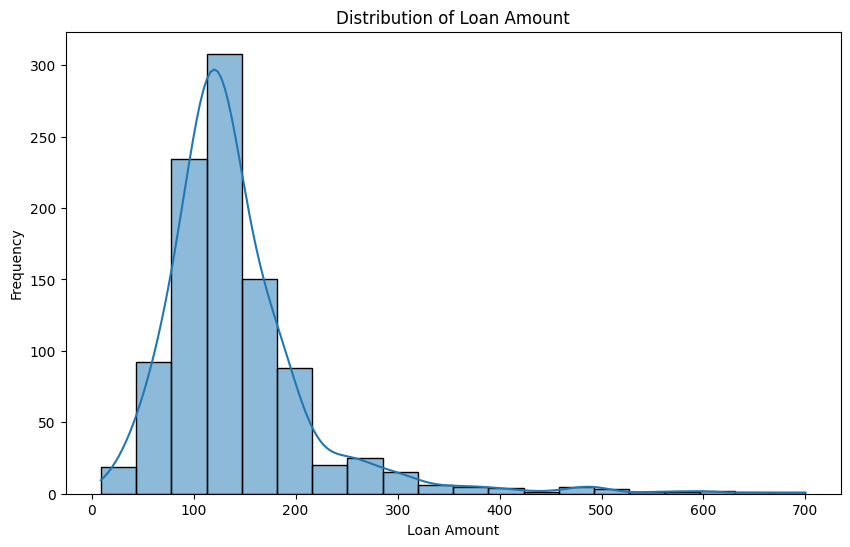

In [36]:
# Additional analysis plots
# Distribution of Loan Amount
plt.figure(figsize=(10, 6))
sns.histplot(data['LoanAmount'].dropna(), bins=20, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


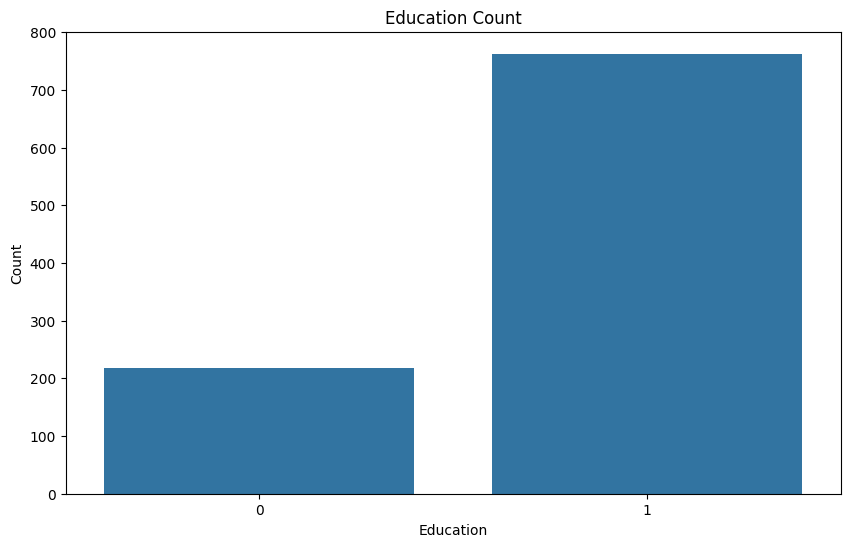

In [37]:

# Countplot for Education
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', data=data)
plt.title('Education Count')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()



<Figure size 1200x800 with 0 Axes>

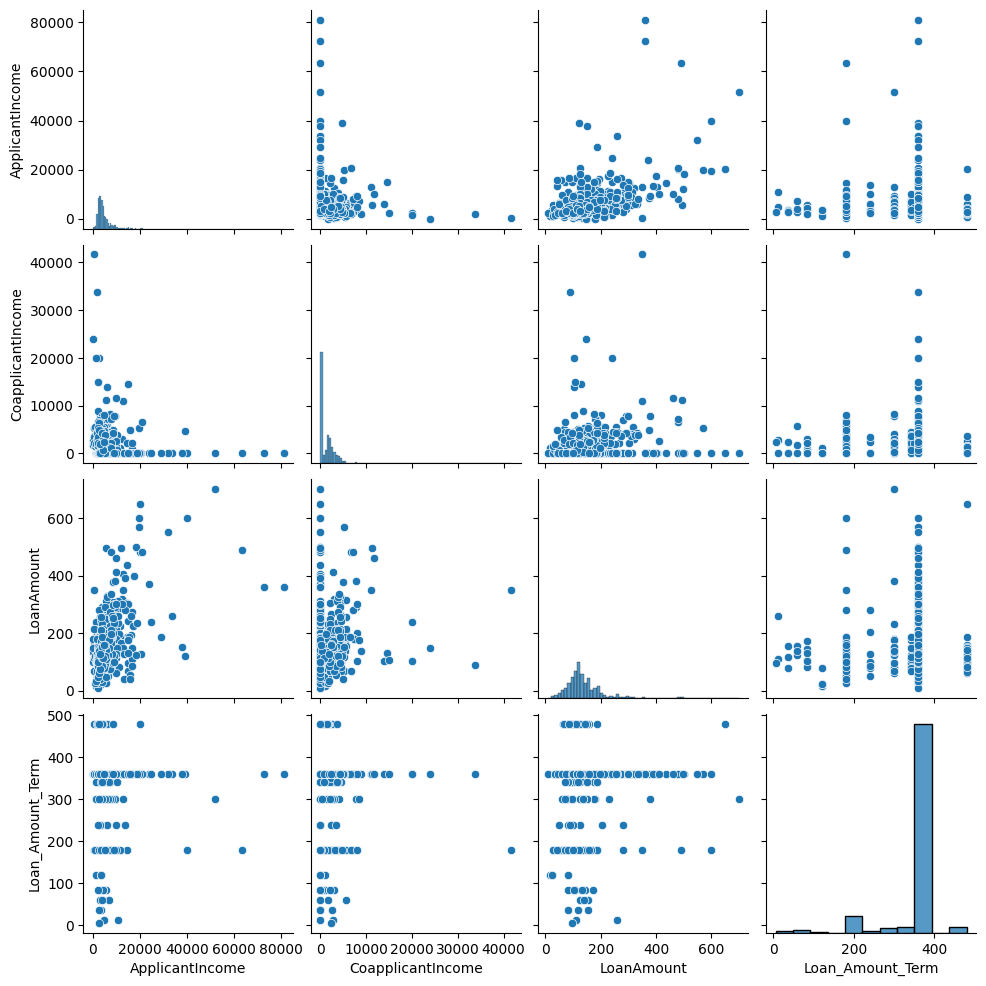

In [39]:
# Pairplot of select features
plt.figure(figsize=(12, 8))
sns.pairplot(data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])
plt.show()



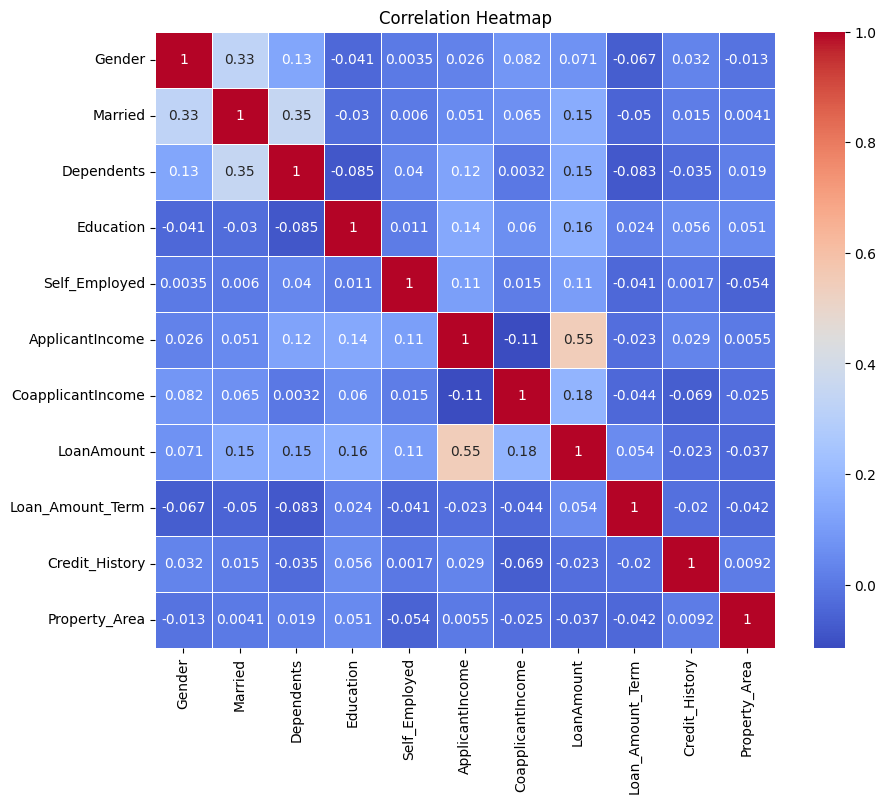

In [40]:
# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()